Topic: Challenge Set **8** <br> Subject: Classification <br> Date: 10/11/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/08-classification_errors/leung_kenny/challenge_set_8_kenny.ipynb

In [140]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import seaborn as sns

%matplotlib inline

In [142]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, roc_curve, auc, precision_score, f1_score, make_scorer

# Challenge 1

In [143]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [144]:
df = pd.read_csv(url,header=None)
df = df.replace(['y','n'],[1,0])
df = df.replace(['republican','democrat'],[1,0])

In [145]:
issues = dict()
for issue in range(1,17):
    issues[issue] = (df.groupby(issue).count()[0][0], 
                     df.groupby(issue).count()[0][1], 
                     df.groupby(issue).count()[0][0]/(df.groupby(issue).count()[0][0]+df.groupby(issue).count()[0][1]))
    
    df[issue] = df[issue].replace('?',issues[issue][2])

In [146]:
X = df.loc[:,1:16]
y = df.loc[:,0]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [148]:
models=[KNeighborsClassifier(n_neighbors=13),LogisticRegression(),GaussianNB(),SVC()
        ,DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    print(model)
    print('Accuracy: ',accuracy_score(y_test,prediction))
    print('Precision: ',precision_score(y_test,prediction))
    print('Recall: ',recall_score(y_test,prediction))
    print('f1: ',f1_score(y_test,prediction))
    print('-----------------------------------------------------------------------------')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
Accuracy:  0.946564885496
Precision:  0.927272727273
Recall:  0.944444444444
f1:  0.935779816514
-----------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy:  0.93893129771
Precision:  0.96
Recall:  0.888888888889
f1:  0.923076923077
-----------------------------------------------------------------------------
GaussianNB(priors=None)
Accuracy:  0.93893129771
Precision:  0.979166666667
Recall:  0.87037037037
f1:  0.921568627451
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_w

# Challenge 2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform') 
AUC:  0.972222222222
-----------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
AUC:  0.989658489658
-----------------------------------------------------------------------------
GaussianNB(priors=None) 
AUC:  0.987253487253
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
AUC:  0.994468494468


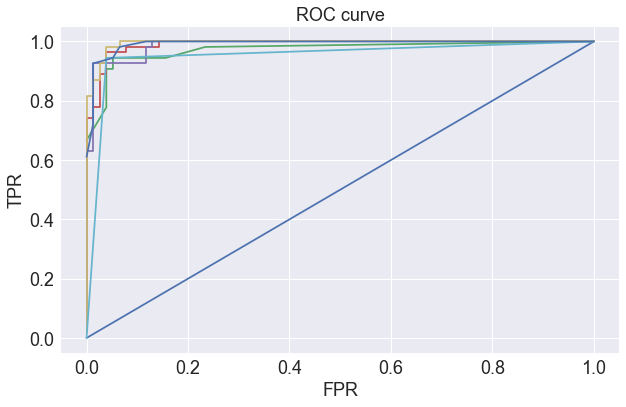

In [149]:
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.30, random_state=4444)

models=[KNeighborsClassifier(n_neighbors=13),LogisticRegression(),GaussianNB(),SVC(probability=True)
        ,DecisionTreeClassifier(),RandomForestClassifier()]

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1])
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.tick_params(axis='both', labelsize=18)

for model in models:
    model.fit(xtrain,np.ravel(ytrain))
    y_score=model.predict_proba(xtest)[:,1]
    
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    print(model, '\nAUC: ',roc_auc)
    print('-----------------------------------------------------------------------------')
    
    plt.plot(fpr,tpr)

# Challenge 3

In [150]:
models=[KNeighborsClassifier(n_neighbors=13),LogisticRegression(),GaussianNB(),SVC()
        ,DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    print(model)
    print('Accuracy: ',np.mean(cross_val_score(model,X,y,cv=5)))
    print('Precision: ',np.mean(cross_val_score(model,X,y,scoring=make_scorer(precision_score),cv=5)))
    print('Recall: ',np.mean(cross_val_score(model,X,y,scoring=make_scorer(recall_score),cv=5)))
    print('f1: ',np.mean(cross_val_score(model,X,y,scoring=make_scorer(f1_score),cv=5)))
    print('-----------------------------------------------------------------------------')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
Accuracy:  0.926401545527
Precision:  0.874396701141
Recall:  0.958110516934
f1:  0.911906601284
-----------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy:  0.958483997959
Precision:  0.944196037137
Recall:  0.952406417112
f1:  0.947273476736
-----------------------------------------------------------------------------
GaussianNB(priors=None)
Accuracy:  0.944795387718
Precision:  0.926828726259
Recall:  0.934581105169
f1:  0.929602292092
-----------------------------------------------------------------------------
SVC(C=1.0, cache_size

# Challenge 4

In [151]:
df3 = pd.read_csv('/Users/kennyleung/_ds/metis/metisgh/sf17_ds8/challenges/challenges_data/2013_movies.csv')

In [152]:
df3.dropna(axis=0,how='any',inplace=True)

In [153]:
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [154]:
X = df3.loc[:,['Budget','DomesticTotalGross','Runtime']]
y = df3.loc[:,'Rating']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [156]:
models=[KNeighborsClassifier(), LogisticRegression()]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    print(model,'\nPrecision: ',precision_score(y_test,prediction,average=None))
    print('Recall: ',recall_score(y_test,prediction,average=None))
    print('-----------------------------------------------------------------------------')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 
Precision:  [ 0.          0.5         0.66666667]
Recall:  [ 0.          0.63636364  0.72727273]
-----------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
Precision:  [ 0.          0.40909091  0.6       ]
Recall:  [ 0.          0.81818182  0.27272727]
-----------------------------------------------------------------------------


/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Challenge 5

In [165]:
df4 = pd.read_csv('/Users/kennyleung/_ds/metis/metisgh/sf17_ds8/challenges/challenges_data/haberman.data',header=None)

In [167]:
df4[3] = df4[3].replace([1],[0])
df4[3] = df4[3].replace([2],[1])

In [168]:
X = df4.loc[:,:2]
y = df4.loc[:,3]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
AUC:  0.647522522523


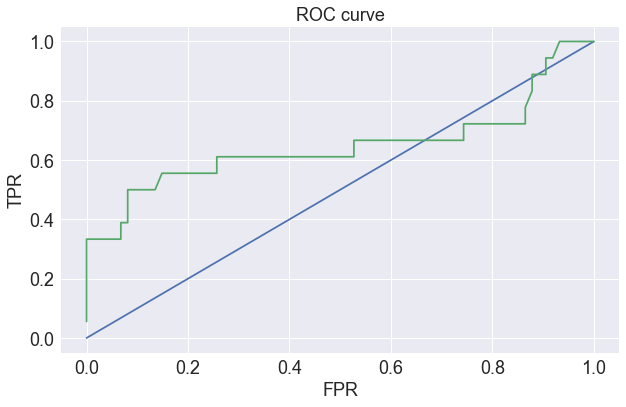

In [170]:
haberman_model = LogisticRegression()
haberman_model.fit(X_train,np.ravel(y_train))
y_score = haberman_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(model, '\nAUC: ',roc_auc)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1])
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.plot(fpr,tpr)